<a href="https://colab.research.google.com/github/mchhour31/NN_work/blob/main/ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Modelling a non-linear equation:

$y = cos(2x_1) + cos(3x_2)$

In [3]:
N = 1000
X = np.random.random((N, 2)) * 6 - 3
y = np.cos(2*X[:, 0]) + np.cos(3*X[:, 1])

In [4]:
X[:, 0].shape

(1000,)

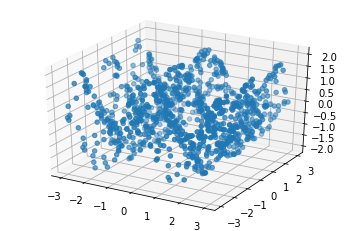

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

In [6]:
from tensorflow.keras import regularizers

model = tf.keras.models.Sequential([
    keras.layers.Dense(128, input_shape=(2,), activation='relu', kernel_regularizer=regularizers.L2(1e-5)),
    keras.layers.Dense(1)
])

In [7]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [8]:
r = model.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.9781 - accuracy: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9479 - accuracy: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9379 - accuracy: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9291 - accuracy: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9205 - accuracy: 0.0000e+00
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9125 - accuracy: 0.0000e+00
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9111 - accuracy: 0.0000e+00
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9053 - accuracy: 0.0000e+00
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9020 - accuracy: 0.0000e+00
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss:

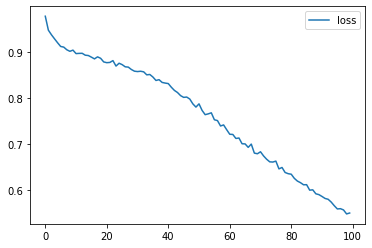

In [9]:
plt.plot(r.history['loss'], label='loss')

plt.legend()

79/79 [==============================] - 0s 2ms/step


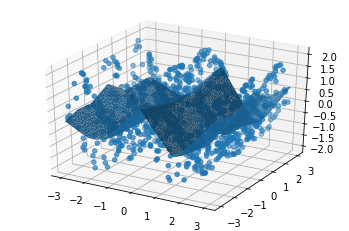

In [12]:
# prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

# surface
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:, 0], xgrid[:, 1], yhat, linewidth=0.2, antialiased=True)
plt.show()

79/79 [==============================] - 0s 1ms/step


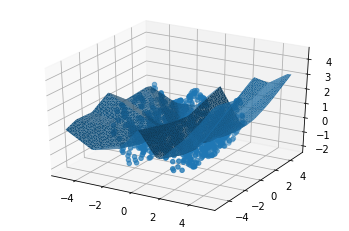

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y)

line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
xgrid = np.vstack((xx.flatten(), yy.flatten())).T
yhat = model.predict(xgrid).flatten()
ax.plot_trisurf(xgrid[:, 0], xgrid[:, 1], yhat, linewidth=0.2, antialiased=True)
plt.show()